## En este Notebook examinaremos las relaciones entre los Features y la variable objetivo.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 

In [2]:
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 100 
df = pd.read_csv('df_clean_4.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


¿Cuál es la proporción de la clase positiva, es decir, de los que no pagaron (default)?

In [4]:
df['default payment next month'].mean()

0.2217971797179718

Los que no pagaron representan el 22.1%. No es un problema particularmente desbalanceado.

He aquí las cantidades:

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Pasaremos todos los features a una lista:

In [6]:
features_response=df.columns.tolist()

Removeremos algunas columnas que no utilizaremos. Recordemos que PAY_2 hasta PAY_6  presentaban inconsistencias, así que no las consideraremos.La columna ID sólo es un identificador, y no tiene nada que ver con la variable respuesta u objetivo. Por otro lado,tampoco consideraremos por el momento los one hot encoding, ya que la información de estas columnas ya está incluida en la variable EDUCATION. Así que usaremos ésta directamente.

In [7]:
items_to_remove = ['ID',\
'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT',\
'graduate school', 'high school', 'none',\
'others', 'university']

In [8]:
features_response=[item for item in features_response if item  not in items_to_remove]

In [9]:
features_response

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Veamos las correlaciones lineales (pearson) entre las columnas:

In [10]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


Visualizaremos estas correlaciones mediante un HeatMap:

<AxesSubplot:>

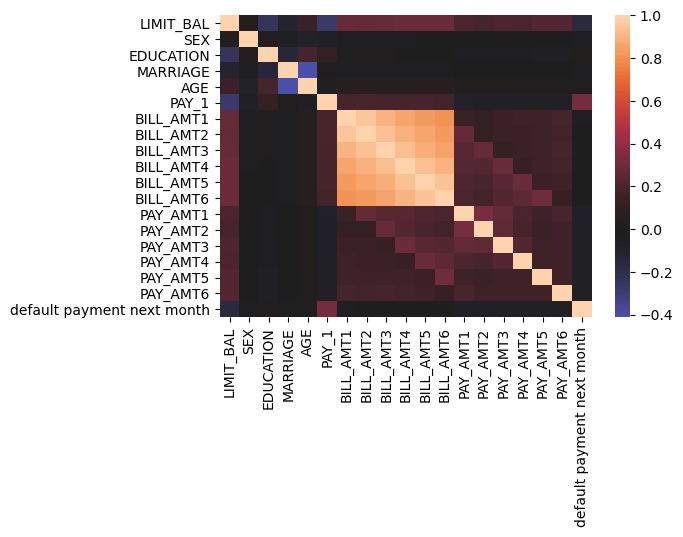

In [11]:
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,
center=0)

Vemos que la variable objetivo se correlaciona más con PAY_1 y LIMIT_BAL. En el primer caso positivamente y en el segundo caso negativamente. Esto tiene sentido, pues a mayor PAY_1 significa más histórico  de deuda y por lo tanto más posibilidad de fallar el pago el mes siguiente. En cambio a más LIMIT_BAL, significa que a la persona se le ha otorgado más cantidad de crédito,en vista de sus antecedentes financieros, por lo tanto tiende a no fallar en el pago. En todo caso, las correlaciones son bajas. Pero estas dos variables parecen ser las únicas que están correlacionadas con la variable objetivo. Estas serían las variables más predictivas para un modelo, por ejemplo Regresión Logística. Por otro lado, se sabe que el coeficiente de Pearson  es teóricamente válido en el caso de variables continuas, mientras que en nuestro caso la variable respuesta es binaria. A pesar de esto,puede dar una rápida idea de la posible utilidad de ciertas variables en un modelo predictivo.

Ahora usaremos un F-test Anova para ver más precisamente la relación entre las variables predictoras y la variable objetivo:

### F-test  ANOVA

In [22]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 18) (26664,)


In [23]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

Ahora creamos un Dataframe con las features, F-statistics, y p-values y las ordenamos en forma creciente según el valor de p:

In [24]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
'F statistic':f_stat,
'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
12,PAY_AMT1,140.612679,2.358354e-32
13,PAY_AMT2,101.408321,8.256124e-24
14,PAY_AMT3,90.023873,2.542641e-21
16,PAY_AMT5,85.843295,2.090120e-20
17,PAY_AMT6,80.420784,3.219565e-19
15,PAY_AMT4,79.640021,4.774112e-19
1,SEX,42.610039,6.801534e-11
2,EDUCATION,32.637768,1.122175e-08


La conclusión es similar que con la correlación lineal. PAY_1 y LIMIT_BAL aparecen como las variables más útiles, que tienen los valores p más pequeños. Esto indica que el promedio de valores de estas variables son significativamente diferentes entre las clases positiva y negativa y que por lo tanto resultan más predictivas.

* El F-test presupone que los datos están normalmente distribuidos!!

### Visualización de relaciones entre features más importantes y variable objetivo.


### Para variable PAY_1

In [25]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [27]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})


In [28]:
group_by_pay_mean_y 

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Es la media de fallo de pago por categoría de PAY_1.

GRÁFICA

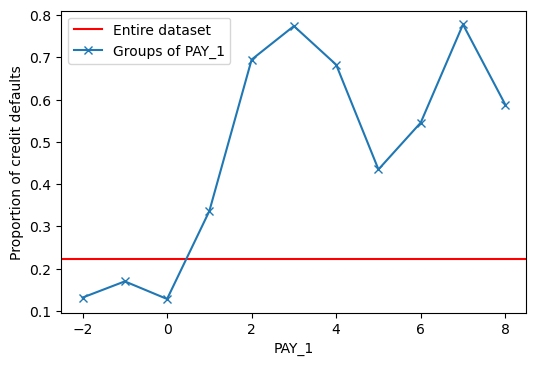

In [29]:
axes = plt.axes()
# Grafica el promedio global como una linea horizontal roja.
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

### Para LIMIT_BAL

In [30]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

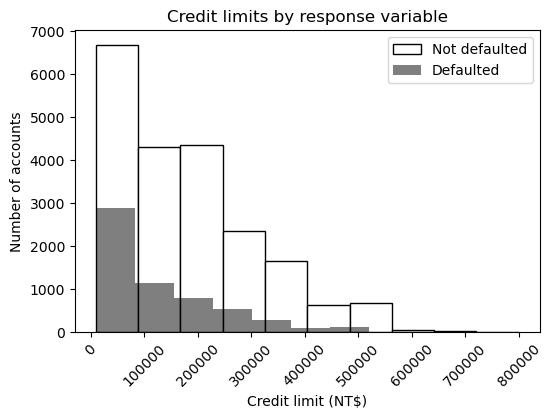

In [31]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],\
edgecolor='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],\
alpha=0.5, edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')